### Classical Machine Learning

We can define classical ML as everything except NN with one or more hidden layers. Linear regression is also ML and embedded in Excel; it will be a question of time that also random forest etc. will be embedded. 

When comparing models it's about different predictions, complexity and speed (and other aspects).

NN often take on the burden of feature engineering (example of iris tabular data vs. iris pictures)

The architecture (i.e. which models are stacked on top of each other in which order) is still kind of a black art. It's all hypothesis-based and iterative so far.

#### Decision Trees

In [1]:
import sklearn.datasets as datasets
import pandas as pd
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [2]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(df, y)
yhat = dtree.predict(df)
y - yhat

# we didn't do the train / test split

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [4]:
dtree.feature_importances_
# this helps with explainability; trees prefer features with many discrete values compared to features with few discrete values

array([0.        , 0.01333333, 0.56405596, 0.42261071])

In [5]:
#import os
#os.environ["PATH"] += os.pathsep + '\\C\\Program Files (x86)\\Graphviz2.38\\bin'

In [6]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data, 
                filled=True, 
                rounded=True, 
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) # this runs into an error (to be fixed; ideally with a package manager)

InvocationException: GraphViz's executables not found

Disadvantages:
* Splits space into rectangles
* Tends to overfit
* Is not robust if new data gets added
* Almost never the optimal predictive power

### Bagging
Bootstrapping and Aggregating (B-Agg-ing)
An ensemble in general is better than an individual model. We can also have e.g. ensembles of NN.

### Random Forest
See definition in slides.
We want to have individual trees that are strong, but not correlated.
Trees are independent, i.e. we can parallelize them.

Despite out-of-bag validation: we still need k folds with validations, and we still need a train and test split.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import seaborn as sns

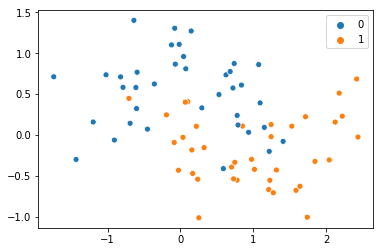

In [8]:
X, y = make_moons(n_samples=100, noise=0.35, random_state=2) # this generates points on a grid which are distributed
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

X_vis = X_train.transpose()
sns.scatterplot(X_vis[0], X_vis[1], y_train);

In [9]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

### Cancer Image with Random Forest

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [11]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# split into train / test data
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [13]:
# fit random forest to train data
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [14]:
# show wrong predictions and accuracy
y_hat = forest.predict(X_test)
print("False positives: " + str(sum(pd.DataFrame(y_test - y_hat)[0]==-1)))
print("False negatives: " + str(sum(pd.DataFrame(y_test - y_hat)[0]==1)))
print("Accuracy:        " + str(100 * round(forest.score(X_test, y_test), 2)) + "%")

False positives: 4
False negatives: 2
Accuracy:        96.0%


In [15]:
# store feature importance
feat_imp_rnd_forest = pd.DataFrame.from_dict(dict(zip(cancer.feature_names, forest.feature_importances_)), 
                                             orient='index', 
                                             columns=['rand_for'])

### Cancer Image with Decision Tree

In [16]:
# fit decision tree to train data
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_hat = dtree.predict(X_test)

In [17]:
# show wrong predictions and accuracy
print("False positives: " + str(sum(pd.DataFrame(y_test - y_hat)[0]==-1)))
print("False negatives: " + str(sum(pd.DataFrame(y_test - y_hat)[0]==1)))
print("Accuracy:        " + str(100*round(dtree.score(X_test, y_test), 2)) + "%")

False positives: 4
False negatives: 8
Accuracy:        92.0%


In [18]:
# store feature importance
feat_imp_dec_tree = pd.DataFrame.from_dict(dict(zip(cancer.feature_names, dtree.feature_importances_)), 
                                           orient='index', 
                                           columns=['dec_tree'])

In [19]:
# compare feature importance
feat_imp = pd.concat([feat_imp_rnd_forest, feat_imp_dec_tree], axis=1, sort=False)
feat_imp = feat_imp.sort_values('rand_for', ascending=False)
feat_imp = feat_imp.rank(method='max')

feat_imp

# todos: we should replace the values with the rank

,rand_for,dec_tree
worst radius,30.0,30.0
worst concave points,29.0,29.0
mean concave points,28.0,24.0
mean area,27.0,17.0
worst texture,26.0,27.0
worst area,25.0,17.0
worst perimeter,24.0,17.0
worst smoothness,23.0,17.0
worst symmetry,22.0,23.0
mean radius,21.0,17.0


Slide with bias / variance
* Blue curve has high variance, low bias
* Red lines has high bias, low variance
Everything with high variance is overfitted. We typically start with overfitted models and then gradually reduce the model complexity.
We know that we have bias if the model is too simple and it's not predicting well. It's difficult to correct because we don't know what the 'center' is.

ROC curve is the preferred method to evaluate binary classifiers. This is used e.g. as a criteria in a grid search.

### Test ROC

In [20]:
import numpy as np

def gen_data(n):
    x_1 = np.random.rand(n, 5)
    x_2 = np.random.rand(n, 5) * 0.75
    x = np.concatenate((x_1, x_2), axis=1)
    y = x[:,0]*np.sin(x[:,0]) + np.sin(2*x[:,1]) + 3*x[:,2] + .4*x[:,3] + x[:,4]
    
    return train_test_split(x, y, test_size=0.5)

x_train, x_test, y_train, y_test = gen_data(100)

In [21]:
# fit random forest to train data
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=5, random_state=2)
forest.fit(x_train, y_train)

# show accuracy
print("Accuracy:        " + str(100 * round(forest.score(x_test, y_test), 2)) + "%")

Accuracy:        78.0%


In [22]:
# store feature importance
feat_imp_val = pd.DataFrame.from_dict(dict(zip(range(10), forest.feature_importances_)), 
                                             orient='index', 
                                             columns=['val'])
feat_imp_rank = feat_imp_val.rank(method='max').rename(columns={"val": "rank"})
feat_imp = pd.concat([feat_imp_val, feat_imp_rank], axis=1, sort=False)

feat_imp

,val,rank
0,0.066086,9.0
1,0.033252,8.0
2,0.819160,10.0
3,0.005087,3.0
4,0.026858,7.0
5,0.006901,4.0
6,0.009924,5.0
7,0.025870,6.0
8,0.005023,2.0
9,0.001838,1.0


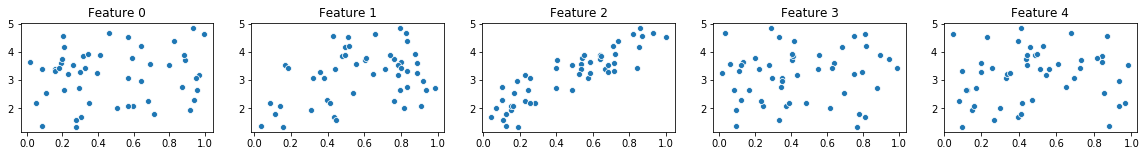

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 2))

for i in range(5):
    plt.subplot(1, 5, i+1)
    sns.scatterplot(x_train[:,i],y_train);
    plt.title('Feature ' + str(i))

plt.show()
plt.close()

### Adaboost
See slides.

### Gradient Boosting Trees
Is a chain of models that train on the residuals (errors) of the preceding model.

```
| Data |  y1_hat  |  m1_res  |  y2_hat  |  m2_res  |  y3_hat  |  m3_res  |
--------------------------------------------------------------------------
|   1  |    1.1   |    0.1   |   0.11   |   0.01   |  0.011   |   0.001  |
--------------------------------------------------------------------------
|   2  |    2.2   |    0.2   |   0.22   |   0.02   |  0.022   |   0.002  |
--------------------------------------------------------------------------
|   3  |    3.3   |    0.3   |   0.33   |   0.03   |  0.033   |   0.003  |
--------------------------------------------------------------------------
|   4  |    4.4   |    0.4   |   0.44   |   0.04   |  0.044   |   0.004  |
--------------------------------------------------------------------------```


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=3, max_depth=2, verbose=1)
gbrt.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set:     {:.3f}'.format(gbrt.score(X_test, y_test)))

      Iter       Train Loss   Remaining Time 
         1           1.1668            0.40s
         2           1.0424            0.34s
         3           0.9391            0.32s
         4           0.8513            0.29s
         5           0.7781            0.25s
         6           0.7086            0.23s
         7           0.6500            0.23s
         8           0.5992            0.22s
         9           0.5533            0.21s
        10           0.5138            0.21s
        20           0.2744            0.16s
        30           0.1794            0.14s
        40           0.1253            0.11s
        50           0.0885            0.09s
        60           0.0654            0.07s
        70           0.0517            0.05s
        80           0.0421            0.03s
        90           0.0347            0.01s
       100           0.0289            0.00s
Accuracy on training set: 1.000
Accuracy on test set:     0.979


### Model Stacking
We add the predictions of several models (e.g. A, B, C) as features to the original data set, then run yet another model (e.g. D) on this 'enriched' data set.

### Interview Questions
_Can a single tree outperform a bagged model?_
No

_Can a single tree outperform a random forest?_
Unlikely, but can happen (e.g. bad luck when sampling or when we have few features

_Can a liner regression outperform a RF?_
Yes, if the problem is linear and the linear regression solves it perfectly.

_In RF, is sampling with replacement?_
With replacement

_What type of trees go into a RF?_
CART trees

_How does RF compare to DL?_
DL for images / text, RF for tabular data

_What is the bias / variance dilemma?_
It's typically a trade-off problem. More variance means overfitting (can be fixed by making the model less complex).

_What are disadvantages of RF?_
Does not work well on text. Large data sets create large trees?

_Does it matter if we have discrete or continuous variables for RF?_
No.

_